In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Listing 2.1 Loading the MNIST dataset in Keras

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

== training ==
(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]
== testing ==
(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]
<class 'numpy.ndarray'>
(28, 28)


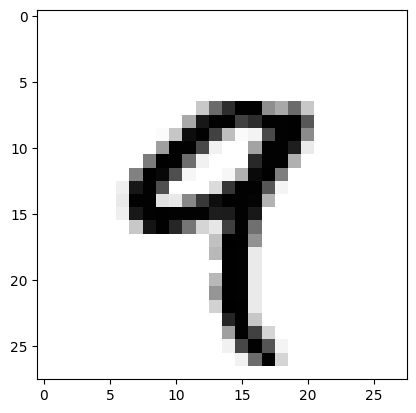

In [3]:
print("== training ==")
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print("== testing ==")
print(test_images.shape)
print(len(test_labels))
print(test_labels)

# print pic #
digit = train_images[4]
print(type(digit))
print(digit.shape)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [4]:
# Listing 2.2 The network architecture

from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

2024-07-14 15:20:51.197942: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
# Listing 2.3 The compilation step

network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [6]:
# Listing 2.4 Preparing the image data

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [7]:
# Listing 2.5 Preparing the labels

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [8]:
# 開始訓練 #
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2600 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1056 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0703 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0512 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0379 - accuracy: 0.9888


In [9]:
# 驗證訓練結果 #
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.0616 - accuracy: 0.9800
test_acc: 0.9800000190734863


<class 'numpy.ndarray'>
(28, 28)


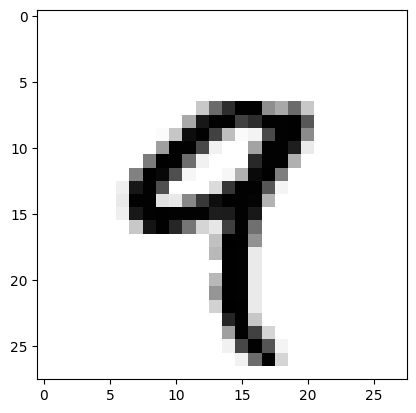

In [10]:
# Listing 2.6 Displaying the fourth digit
import matplotlib.pyplot as plt
from keras.datasets import mnist

# 要重新載入資料才能秀出圖形，要不然無法顯示圖形(因為資料被改過了)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

digit = train_images[4]
print(type(digit))
print(digit.shape)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

(90, 14, 14)
<class 'numpy.ndarray'>
(14, 14)


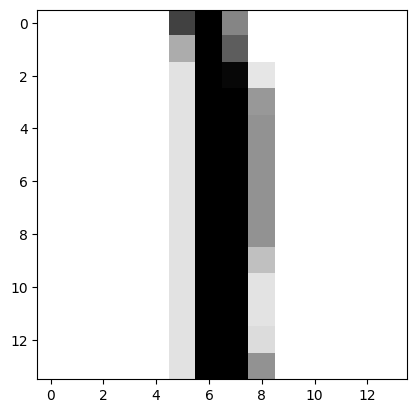

In [11]:
# For Test
my_slice = train_images[10:100, 7:-7, 7:-7]
print(my_slice.shape)

digit = my_slice[4]
print(type(digit))
print(digit.shape)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()